In [18]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import AgglomerativeClustering  # 계층적 군집분석
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import mglearn
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False

In [3]:
from scipy.cluster.hierarchy import dendrogram, ward, linkage

In [4]:
x, y = make_blobs(random_state=1)

agg = AgglomerativeClustering(n_clusters=3)
a = agg.fit_predict(x)

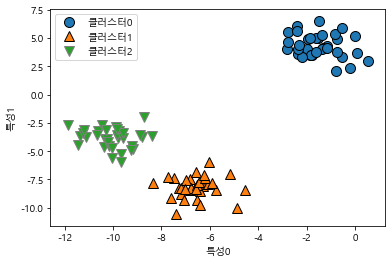

In [5]:
mglearn.discrete_scatter(x[:,0],x[:,1],a)
plt.legend(['클러스터0','클러스터1','클러스터2'], loc='best')
plt.xlabel('특성0')
plt.ylabel('특성1')
plt.show()

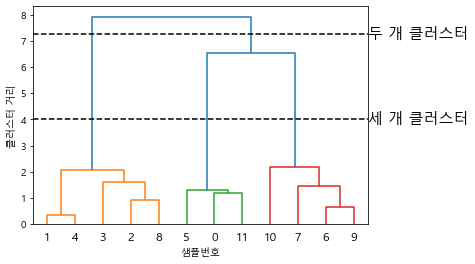

In [8]:
x, y = make_blobs(random_state=0, n_samples=12)

# data 배열 x에 ward 함수 적용
# 계층적군집을 수행할 때 거리 정보가담긴 배열을 리턴
linkage_array = ward(x)

# 클러스터 간 거리 정보가 담긴 linkage_array를 사용해서 dendrogram을 그림
dendrogram(linkage_array)

# 클러스터 갯수를 구분하는 라인을 그어서 그려봄
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25,7.25],'--',c='k')
ax.plot(bounds, [4,4],'--',c='k')

ax.text(bounds[1], 7.25, '두 개 클러스터', va='center',fontdict={'size':15})
ax.text(bounds[1], 4, '세 개 클러스터', va='center',fontdict={'size':15})
plt.xlabel('샘플번호')
plt.ylabel('클러스터 거리')
plt.show()

대진표 그릴 때 사용해도 될 듯

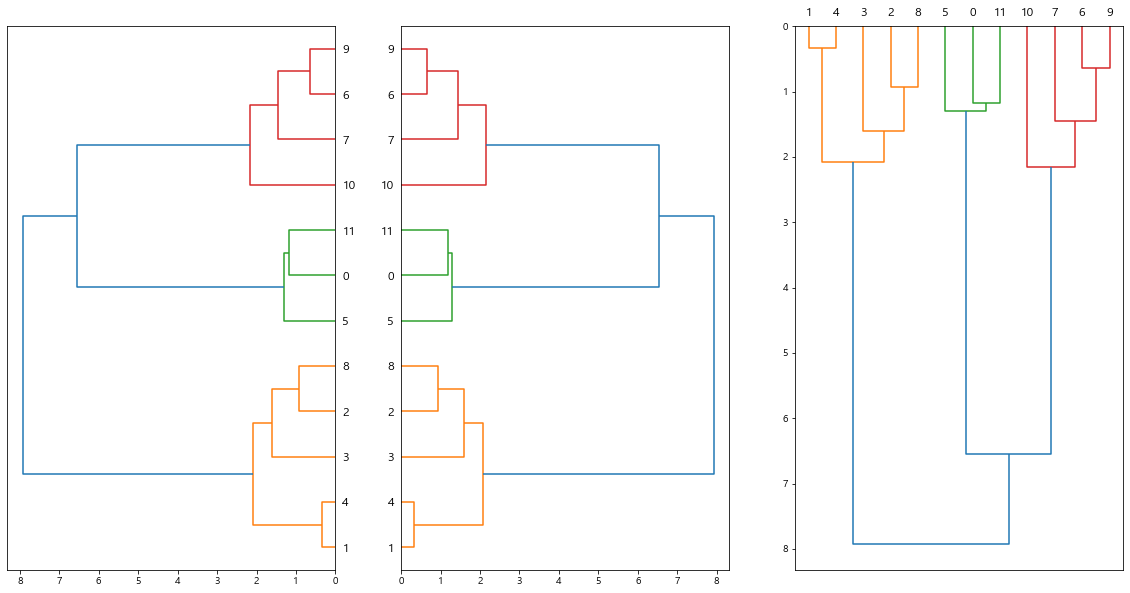

In [13]:
fig = plt.figure(figsize=(20,10))

# linkage_array = ward(x)
# dendrogram(linkage_array)
ax1 = fig.add_subplot(1,3,1)
d1 = linkage(x, method='ward')
dr1 = dendrogram(d1, orientation='left')

ax2 = fig.add_subplot(1,3,2)
d2 = linkage(x, method='ward')
dr2 = dendrogram(d2, orientation='right')

ax3 = fig.add_subplot(1,3,3)
d3 = linkage(x, method='ward')
dr3 = dendrogram(d3, orientation='bottom')

plt.show()

DBSCAN

In [14]:
from sklearn.cluster import DBSCAN

In [16]:
dbscan = DBSCAN()
dbscan.fit_predict(x)
# -1만 나오면 군집형성이 안되었다는 의미

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [17]:
x, y = make_moons(n_samples=200, noise=0.5, random_state=0)

In [20]:
scale = StandardScaler()
x_scaled = scale.fit_transform(x)

dbscan = DBSCAN()
dbscan.fit_predict(x_scaled)

array([ 0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=int64)

Text(0, 0.5, '특성1')

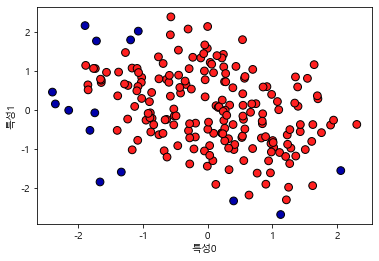

In [21]:
plt.scatter(x_scaled[:,0],x_scaled[:,1],c=dbscan.fit_predict(x_scaled), cmap=mglearn.cm2, s=60, edgecolors='black')
plt.xlabel('특성0')
plt.ylabel('특성1')